In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from pylab import savefig

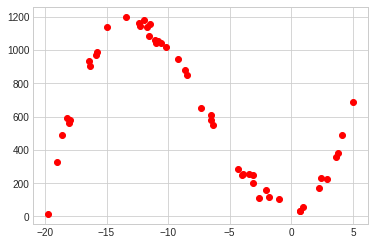

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
ns=100
samples = 50
x = 25 * (np.random.rand(samples,1)-0.8)
y = 5*x + 20*x**2 + 1*x**3 + ns*np.random.rand(samples,1)
plt.plot(x,y,'ro')

[ 0.99876419 19.91385227  4.00568397 46.05565532]
        3         2
0.9988 x + 19.91 x + 4.006 x + 46.06


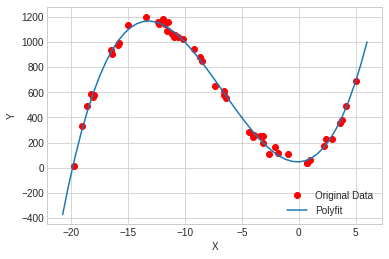

In [5]:
X1 = x.flatten()
Y1 = y.flatten()
m = 3
params = np.polyfit(X1,Y1,m)
poly_eqn = np.poly1d(params)
print(params)
print(poly_eqn)
x_axis = np.linspace(min(X1-1), max(X1+1), 50, endpoint = True)
plt.plot(x,y,'or',label = "Original Data")
plt.plot(x_axis,poly_eqn(x_axis),label = "Polyfit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

In [ ]:
import numpy.random as rand
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

class gene:
    def __init__(self, c, d):
        self.values = [[np.random.randn() for _ in range(c + 1)] for _ in range(d)]
        self.fit = None

    def evaluate(self, dataset):
        self.fit = 0
        for x in dataset.keys():
            image = 0
            for variable in self.values:
                for power, coefficient in enumerate(variable):
                    image += coefficient * x ** power
            target = dataset[x]
            mse = (target - image) ** 2
            self.fit += mse

    def co(crossval):
        chromosome_nextgen=crossval
        for i in range(len(crossval)):
            child=crossval[i]
            child[3:7]=crossval[(i+1)%len(crossval)][3:7]
            chromosome_nextgen.append(child)
        return chromosome_nextgen

    def mutation(self, rate):
        chromosome_nextgen = []
        for i in range(0,len(self.values)):
            chromosome = self.values[i]
            for j in range(len(chromosome)):
                if rand.random() < rate:
                    chromosome[j]= not chromosome[j]
            chromosome_nextgen.append(chromosome)
        self.values = chromosome_nextgen[-1]

    def mutate(self, rate):
        self.values = [[rand.uniform(c - rate, c + rate) for c in variable]
                       for variable in self.values]

    def roundCoefficients(self):
        self.values = [[round(value, 3) for value in variable]
                       for variable in self.values] 
                
class chromosome:
    def __init__(self, c, d, size=50):
        self.genes = [gene(c, d) for _ in range(size)]
        self.best = [gene(c, d)]
        self.rate = 0.001
        plt.ion()

    def sort(self):
        self.genes = sorted(self.genes, key=lambda indi: indi.fit)
                    
    def evaluate(self, dataset):
        for indi in self.genes:
            indi.evaluate(dataset)

    def upgrade(self, dataset):
        newgenes = []
        for gene in self.genes[:10]:
            newgenes.append(deepcopy(gene))
            for _ in range(9):
                newgene = deepcopy(gene)
                newgene.mutate(self.rate)
                newgenes.append(newgene)
        self.genes = newgenes
        self.evaluate(dataset)
        self.sort()
        self.best.append(self.genes[0])
        if self.best[-1].fit == self.best[-2].fit:
            self.rate += 0.0005
        else:
            self.rate = 0.001
        
    def plot2D(self, x, y, epochs):
        X = np.linspace(min(x), max(x))
        Y = [sum(c * (x ** p)
          for p, c in enumerate(variable))
          for variable in self.best[-1].values
          for x in X]
        plt.plot(X, Y)
        plt.scatter(x, y, c='red')
        plt.title('GA Polyfit')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from pylab import savefig

plt.style.use('ggplot')
y = 'y'
dataset = {}
for i, data in df.iterrows():
    key = data['x']
    dataset[key] = data[y]

epochss = 300
power = 6

poly = chromosome(power, 1)
poly.evaluate(dataset)
poly.sort()

for g in range(epochss):
    poly.upgrade(dataset)

poly.plot2D(df['x'], df[y], g)

In [ ]:
poly.plot2D(df['x'], df[y], g)

plt.plot(x,y,'or',label = "GA polyfit")
plt.plot(x_axis,poly_eqn(x_axis),'-b',label = "Polyfit func")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

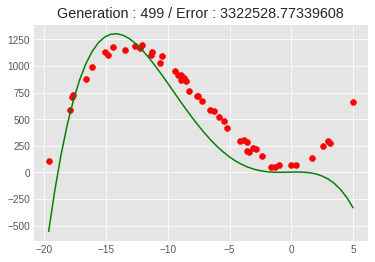

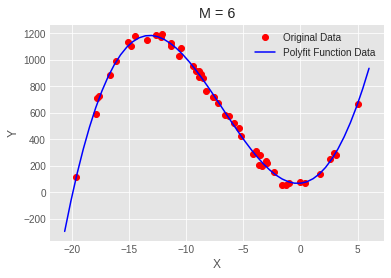

In [ ]:
polynomials.plot2D(df['x'], df[function], g)

plt.plot(x,y,'or',label = "Original Data")
plt.plot(x_axis,poly_eqn(x_axis),'-b',label = "Polyfit Function Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("M = " + str(m))
plt.legend()